In [1]:
import sys
from pathlib import Path
from torchvision import datasets

In [2]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

data_root = project_root / "data"
data_root.mkdir(parents=True, exist_ok=True)

In [7]:
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

from utils.utils import set_seed

set_seed()

from methods.naive.naive_utils import init_dataloaders
from utils.train_test_metrics import train_model
from utils.train_test_metrics import plot_training_history
from utils.train_test_metrics import test_model
from utils.train_test_metrics import show_metrics
from models.simple_cnn import init_model_cnn
from methods.naive.naive_utils import recreate_dataloaders

Device used: cuda


In [4]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 10

In [5]:
model, model_name, criterion, optimizer, transform = init_model_cnn(
    learning_rate=LEARNING_RATE
)

Init model...
Done initializing model.
Model ID: 2044528649088, Optimizer ID: 2043921203312, Criterion ID: 2044515406544


In [6]:
results_path = project_root / "results" / "mnist" / "naive"

In [8]:
train_dataset = datasets.MNIST(
    root=data_root, train=True, transform=transform, download=True
)
test_dataset = datasets.MNIST(
    root=data_root, train=False, transform=transform, download=True
)
data_split_path = results_path / "mnist_data_splits.json"

train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=data_split_path,
    datasets=(train_dataset, test_dataset),
    batch_size=BATCH_SIZE,
)

Recreating DataLoaders...
Done recreating DataLoaders.


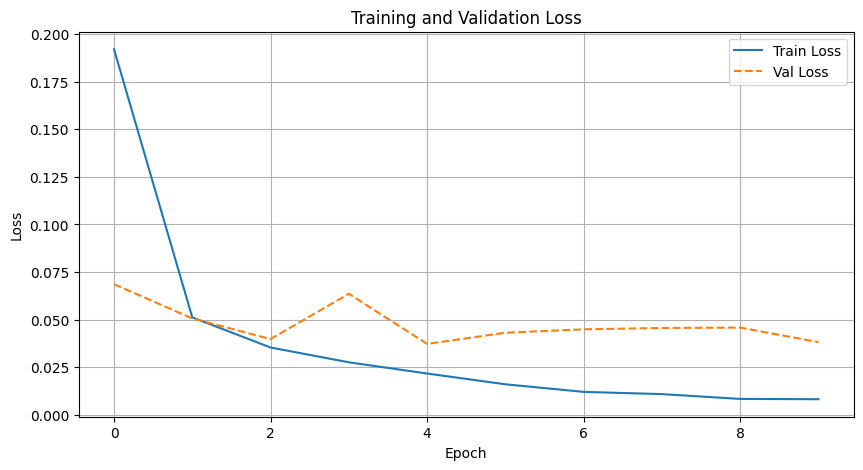

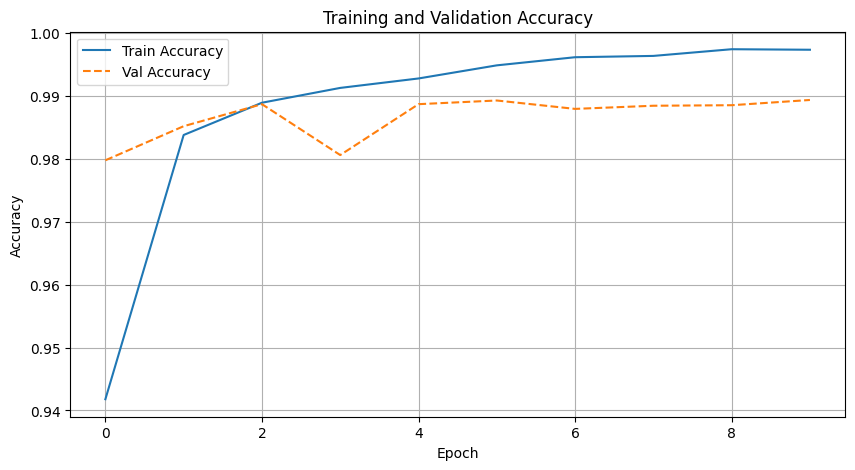

In [9]:
history_path = results_path / f"{model_name}_history.json"
plot_training_history(history_path)

In [10]:
model_path = results_path / f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader, results_path=results_path)

Loading and testing model: CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\naive\CNN_MNIST_model.pth: 100%|██████████| 157/157 [00:02<00:00, 77.57it/s]


Predictions and labels saved to CNN_MNIST_predictions.json


Metrics for CNN_MNIST:
  - Test Accuracy: 0.9905
  - Precision: 0.9905
  - Recall: 0.9905
  - F1 Score: 0.9905


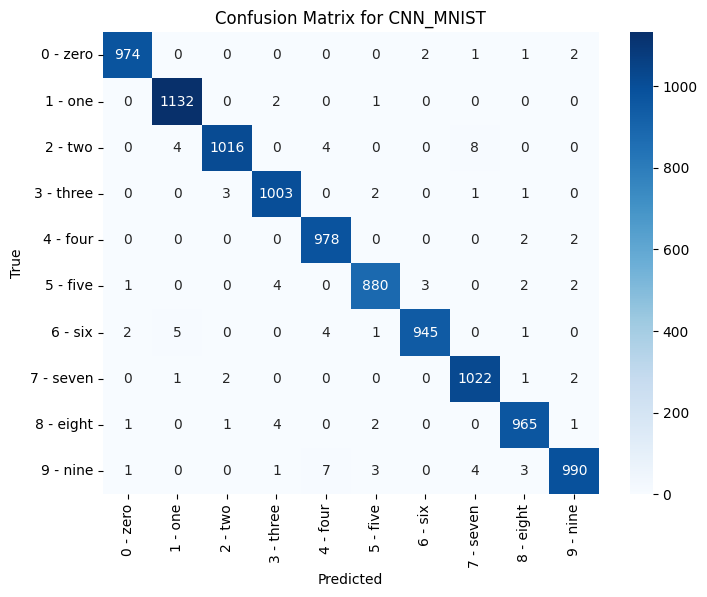

In [11]:
predictions_path = results_path / f"{model_name}_predictions.json"
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

# Unlearning results

In [12]:
data_splits_file = results_path / "mnist_data_splits.json"
unlearn_samples_file = results_path / "mnist_samples_to_unlearn_30per.json"
updated_data_splits_path = results_path / "updated_mnist_data_splits.json"

In [13]:
model, model_name, criterion, optimizer, transform = init_model_cnn(
    learning_rate=LEARNING_RATE
)
model_name = "naive_unlearning_" + model_name

Init model...
Done initializing model.
Model ID: 2045458300832, Optimizer ID: 2045457605984, Criterion ID: 2045457610928


In [14]:
train_dataset = datasets.MNIST(
    root=data_root, train=True, transform=transform, download=True
)
test_dataset = datasets.MNIST(
    root=data_root, train=False, transform=transform, download=True
)

In [15]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset),
    batch_size=BATCH_SIZE,
)

Recreating DataLoaders...
Done recreating DataLoaders.


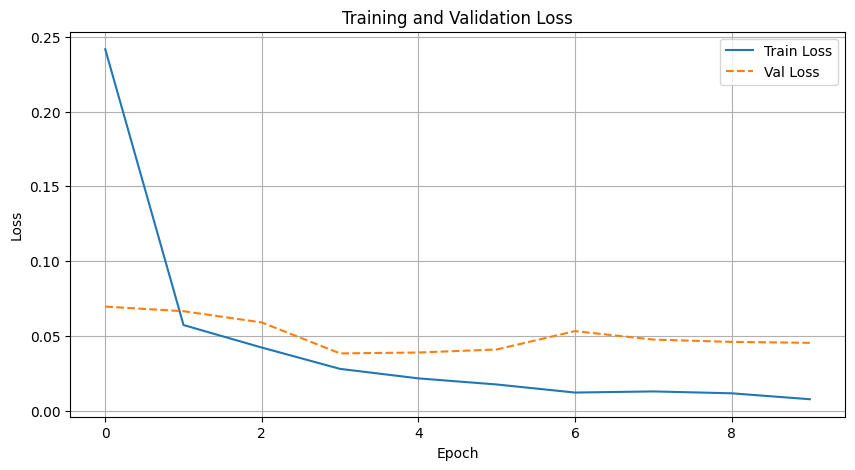

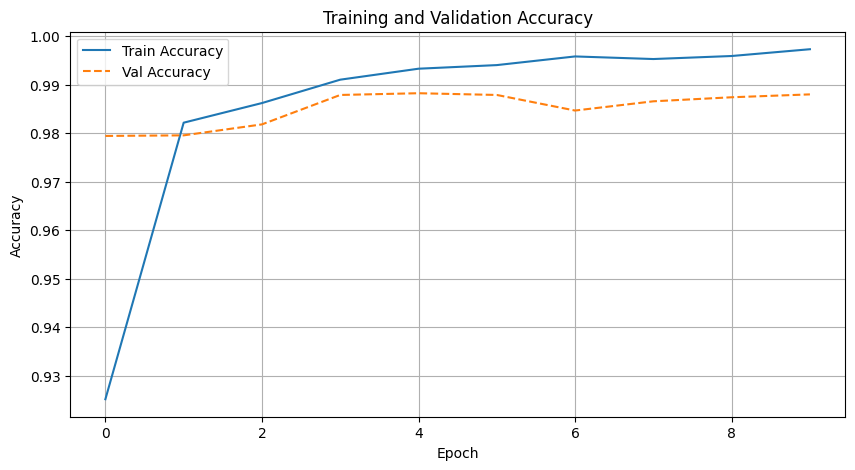

In [16]:
history_path = results_path / f"{model_name}_history.json"
plot_training_history(history_path)

In [18]:
model_path = results_path / f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader, results_path=results_path)

Loading and testing model: naive_unlearning_CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\naive\naive_unlearning_CNN_MNIST_model.pth: 100%|██████████| 157/157 [00:01<00:00, 84.73it/s]

Predictions and labels saved to naive_unlearning_CNN_MNIST_predictions.json


Metrics for naive_unlearning_CNN_MNIST:
  - Test Accuracy: 0.9881
  - Precision: 0.9881
  - Recall: 0.9881
  - F1 Score: 0.9881


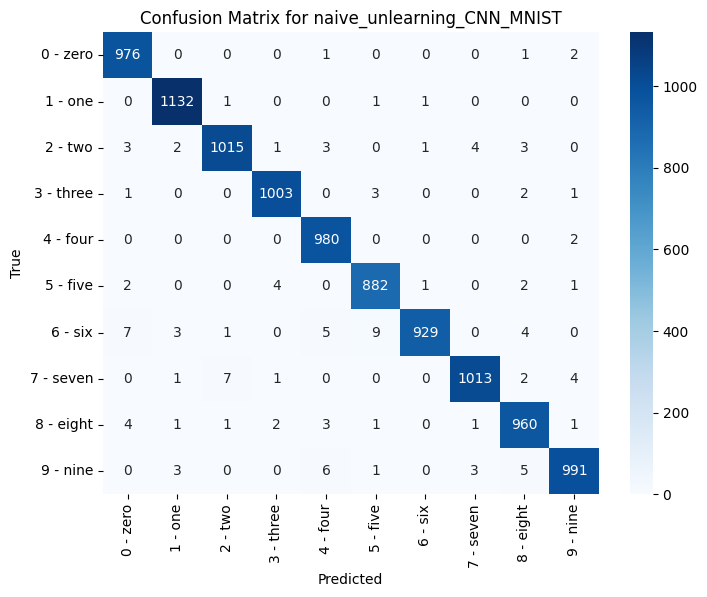

In [19]:
predictions_path = results_path / f"{model_name}_predictions.json"
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)